In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

# 1. EDA

In [22]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('creditcard.csv')

# Menampilkan 5 baris pertama dari dataset
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Menampilkan informasi dataset (jumlah baris, kolom, dan tipe data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
# Menampilkan statistik deskriptif
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
# Mengecek apakah ada nilai yang hilang dalam dataset
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Melihat distribusi kelas (fraud vs non-fraud)
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


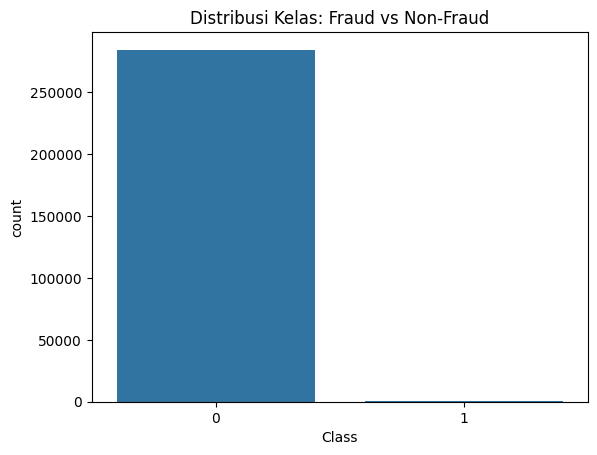

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi kelas
sns.countplot(x='Class', data=df)
plt.title('Distribusi Kelas: Fraud vs Non-Fraud')
plt.show()


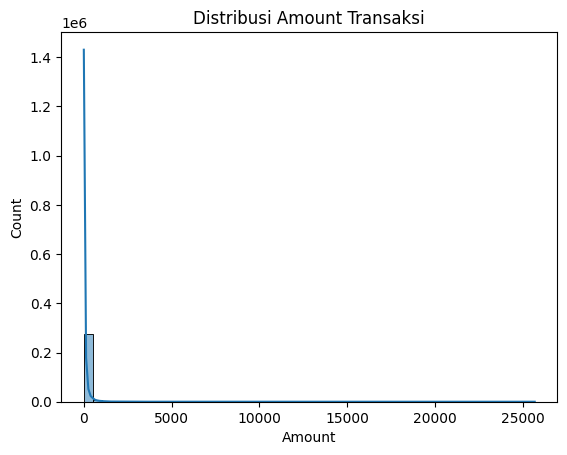

In [7]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribusi Amount Transaksi')
plt.show()

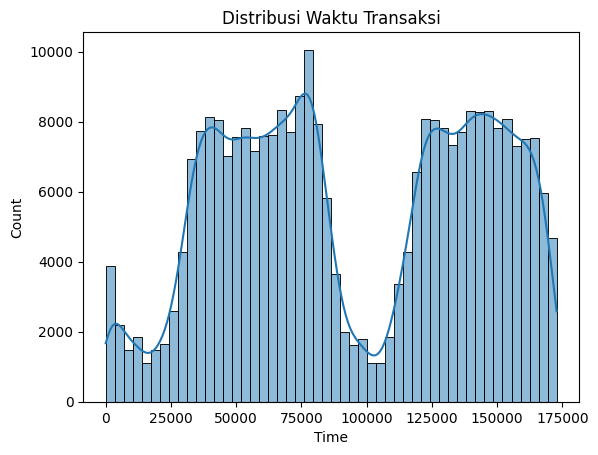

In [8]:
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribusi Waktu Transaksi')
plt.show()


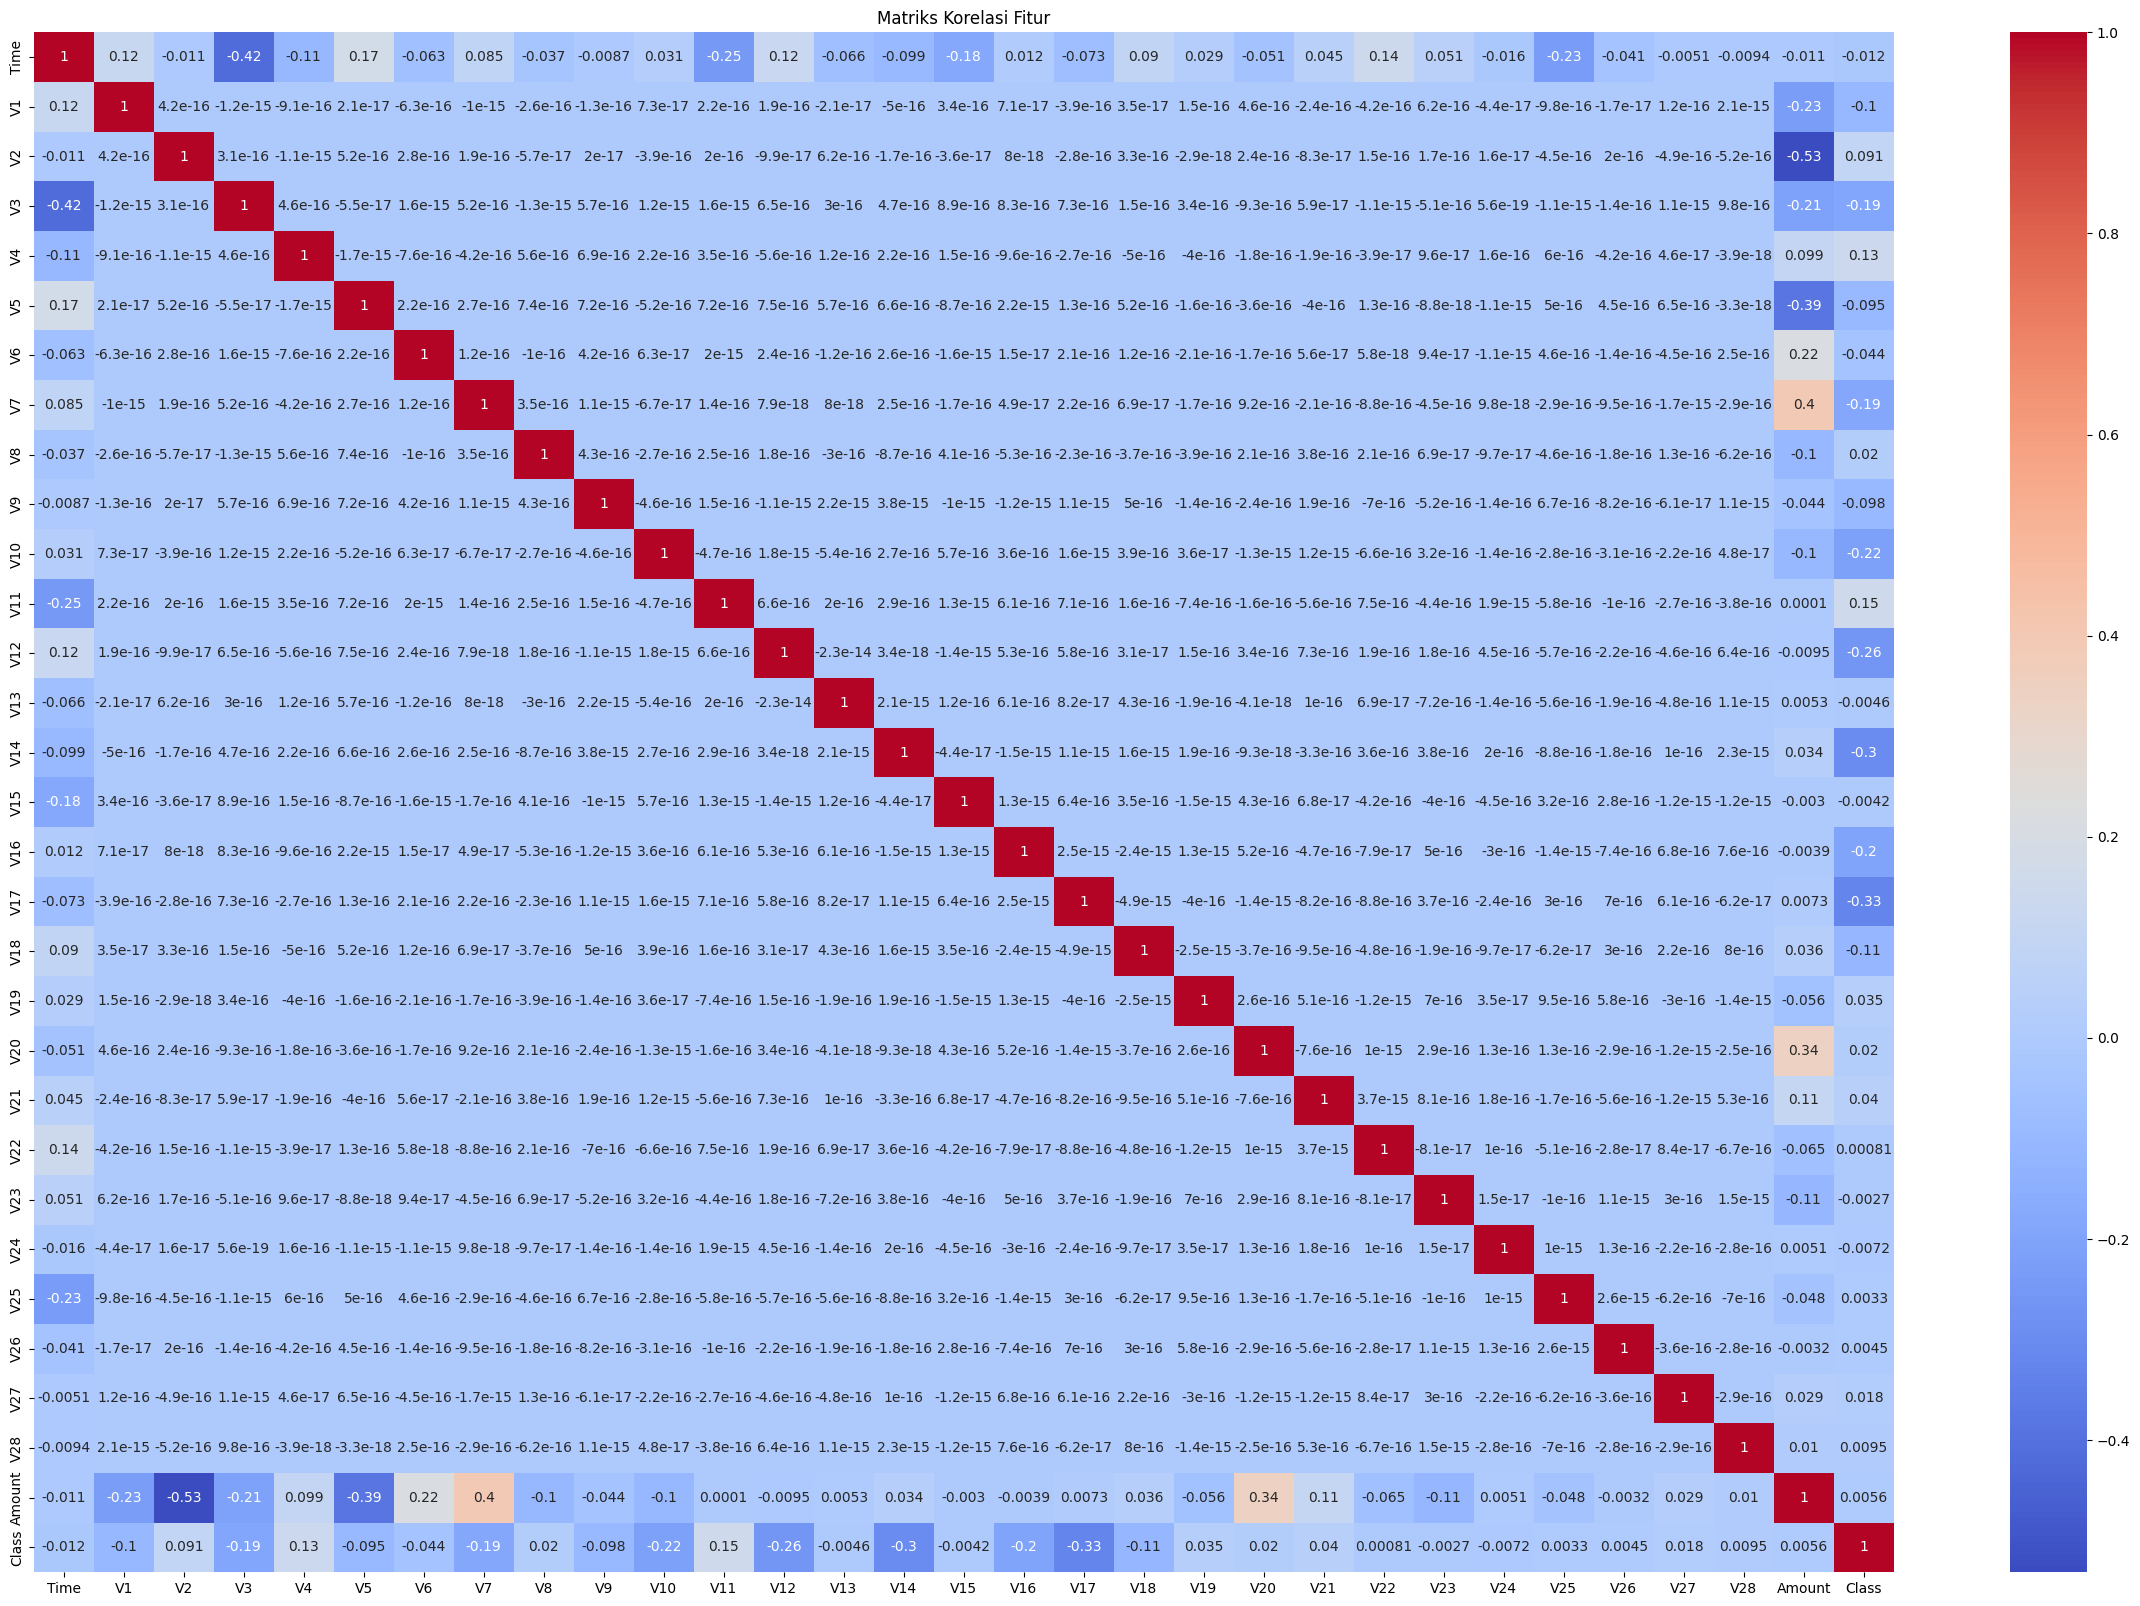

In [9]:
# Matriks korelasi antar fitur numerik
correlation_matrix = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Fitur')
plt.show()


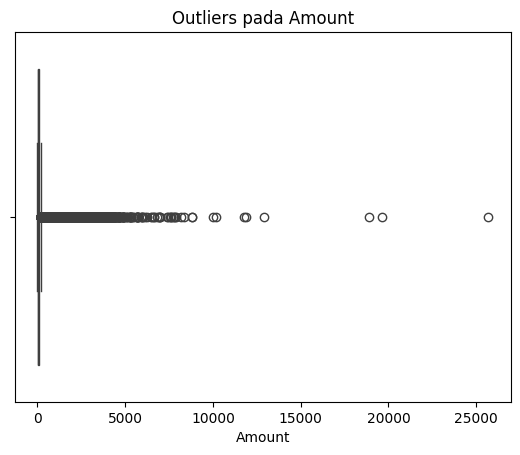

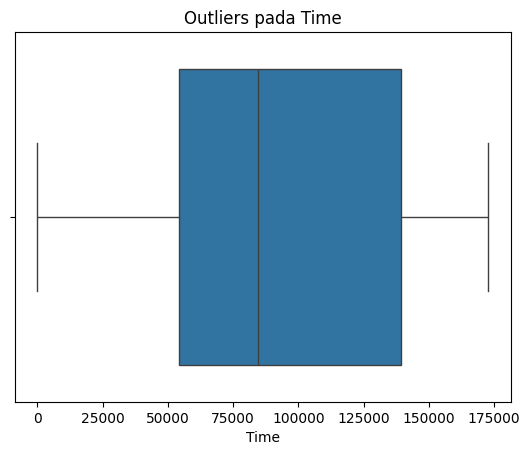

In [10]:
# Memeriksa outliers pada Amount dan Time
sns.boxplot(x=df['Amount'])
plt.title('Outliers pada Amount')
plt.show()

sns.boxplot(x=df['Time'])
plt.title('Outliers pada Time')
plt.show()


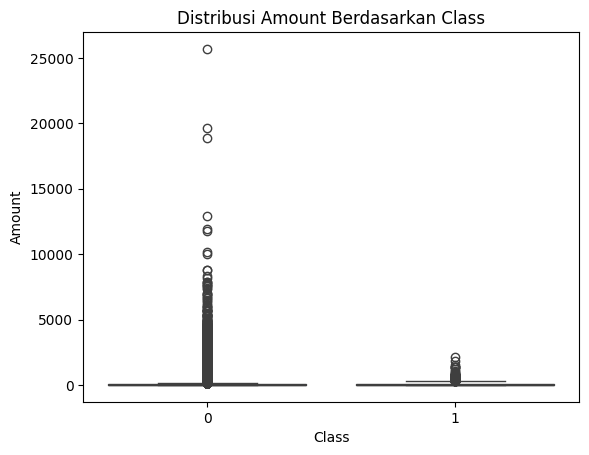

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribusi Amount Berdasarkan Class')
plt.show()


# 2. Data Preprocessing

In [23]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df['Time_Scaled']=scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount_Scaled']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# Drop Time and Amount Feature from dataset as we add Time_Scaled and Amount_Scaled in DataFrame 
df.drop(columns=['Time','Amount'],inplace=True,axis=1)

In [24]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Scaled,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [25]:
# Mengecek kolom Amount setelah scaling
print("\nAmount setelah scaling:")
print(df['Amount_Scaled'].head())

# Mengecek kolom Time setelah scaling
print("\nTime setelah scaling:")
print(df['Time_Scaled'].head())


Amount setelah scaling:
0    1.783274
1   -0.269825
2    4.983721
3    1.418291
4    0.670579
Name: Amount_Scaled, dtype: float64

Time setelah scaling:
0   -0.994983
1   -0.994983
2   -0.994972
3   -0.994972
4   -0.994960
Name: Time_Scaled, dtype: float64


# 3. Model Selection and Training

### balancing the data

In [26]:
from sklearn.model_selection import StratifiedKFold 

As we know out dataset contain 99.827% of Non-Fraudulent Data and 0.173% of Fraudulent Data and for futher analysis we want to split into train,test but normal train_test_split method doesn't work here so we import StratifiedKFold to split Imbalance data

In [27]:
X=df.drop(columns=['Class'])
y=df['Class']
skf=StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    print("Train Index:", train_index, "Test Index:", test_index)
x_train,x_test=X.iloc[train_index],X.iloc[test_index]
y_train,y_test=y.iloc[train_index],y.iloc[test_index]
#y_train,y_test

Train Index: [ 30473  30496  31002 ... 284804 284805 284806] Test Index: [    0     1     2 ... 57017 57018 57019]
Train Index: [     0      1      2 ... 284804 284805 284806] Test Index: [ 30473  30496  31002 ... 113964 113965 113966]
Train Index: [     0      1      2 ... 284804 284805 284806] Test Index: [ 81609  82400  83053 ... 170946 170947 170948]
Train Index: [     0      1      2 ... 284804 284805 284806] Test Index: [150654 150660 150661 ... 227866 227867 227868]
Train Index: [     0      1      2 ... 227866 227867 227868] Test Index: [212516 212644 213092 ... 284804 284805 284806]


In [28]:
# let's confirm how much percentage each category fall in train and test data 
#For y_train
print(f"Non-Fraudulent Transcations in y_train: {round(((y_train.values==0).sum()/y_train.shape[0])*100,3)}%")
#Percentage of fraudulent data in y_train
print(f"Fraudulent Transcations in y_train: {round(((y_train.values==1).sum()/y_train.shape[0])*100,3)}%")
print()
#For y_test
print(f"Non-Fraudulent Transcations in y_test: {round(((y_test.values==0).sum()/y_test.shape[0])*100,3)}%")
#Percentage of fraudulent data in y_test
print(f"Fraudulent Transcations in y_train: {round(((y_test.values==1).sum()/y_test.shape[0])*100,3)}%")

Non-Fraudulent Transcations in y_train: 99.827%
Fraudulent Transcations in y_train: 0.173%

Non-Fraudulent Transcations in y_test: 99.828%
Fraudulent Transcations in y_train: 0.172%


### random undersampling


In [37]:
# Let's Do Random Undersampling to train the ML models cause our dataset is imbalanced
#before preceding to Randomsample make sure your data is suffled so you get suffled Non-Fraudulent for better result
df=df.sample(284807)
Fraud_Data=df[df['Class']==1]
Non_Fraud_Data=df[df['Class']==0][:492]
new_df=pd.concat([Fraud_Data,Non_Fraud_Data])
new_df=new_df.sample(n=new_df.shape[0],random_state=42)  

In [30]:
new_df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Scaled,Amount_Scaled
17317,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,-8.009159,...,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,1,-0.658690,1.089779
261473,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,-0.099528,-1.672346,...,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,1,0.885137,-0.238944
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.906648,-0.293440
206182,-1.349733,-0.018732,0.834408,-0.502238,2.113726,-1.134239,0.533710,-0.117291,-0.274934,-1.284660,...,0.083408,-0.519519,-0.410143,0.951841,0.691032,-0.228236,-0.148355,0,0.603943,-0.293440
187831,-1.217227,1.082893,0.808994,-1.271697,0.577978,0.022442,0.494284,0.617840,-0.866958,-0.806482,...,-1.567302,-0.031736,0.137050,0.228161,0.140374,0.060694,0.022520,0,0.505387,0.052260


### define train & test 

In [38]:
X_undersample=new_df.drop(columns='Class')
y_undersample=new_df['Class']

In [39]:
from sklearn.model_selection import train_test_split
x_train_us,x_test_us,y_train_us,y_test_us=train_test_split(X_undersample,y_undersample,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [58]:
print('--------------------Logistic Regression-------------------')
lr=LogisticRegression()
lr.fit(x_train_us,y_train_us)
y_pred_lr=lr.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_lr,y_test_us))
print(classification_report(y_test_us,y_pred_lr))
print()

print('---------------------------SVM------------------------------')
svc=SVC()
svc.fit(x_train_us,y_train_us)
y_pred_svc=svc.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_svc,y_test_us))
print(classification_report(y_test_us,y_pred_svc))

print()
print('--------------------------Knn------------------------------')
knn=KNeighborsClassifier()
knn.fit(x_train_us,y_train_us)
y_pred_knn=knn.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_knn,y_test_us))
print(classification_report(y_test_us,y_pred_knn))


print()
print('----------------------GaussianNB----------------------')
gnb=GaussianNB()
gnb.fit(x_train_us,y_train_us)
y_pred_gnb=gnb.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_gnb,y_test_us))
print(classification_report(y_test_us,y_pred_gnb))

print()
print('------------------RandomForestClassifier----------------')
rfc=RandomForestClassifier()
rfc.fit(x_train_us,y_train_us)
y_pred_rfc=rfc.predict(x_test_us)
print("ROC AUC Score",roc_auc_score(y_pred_rfc,y_test_us))
print(classification_report(y_test_us,y_pred_rfc))

--------------------Logistic Regression-------------------
ROC AUC Score 0.9375260091552227
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        87
           1       0.95      0.94      0.94       110

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197


---------------------------SVM------------------------------
ROC AUC Score 0.9320393374741202
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        87
           1       0.96      0.92      0.94       110

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197


--------------------------Knn------------------------------
ROC AUC Score 0.9321910695742471
              precision    recall  f1-score   support

          

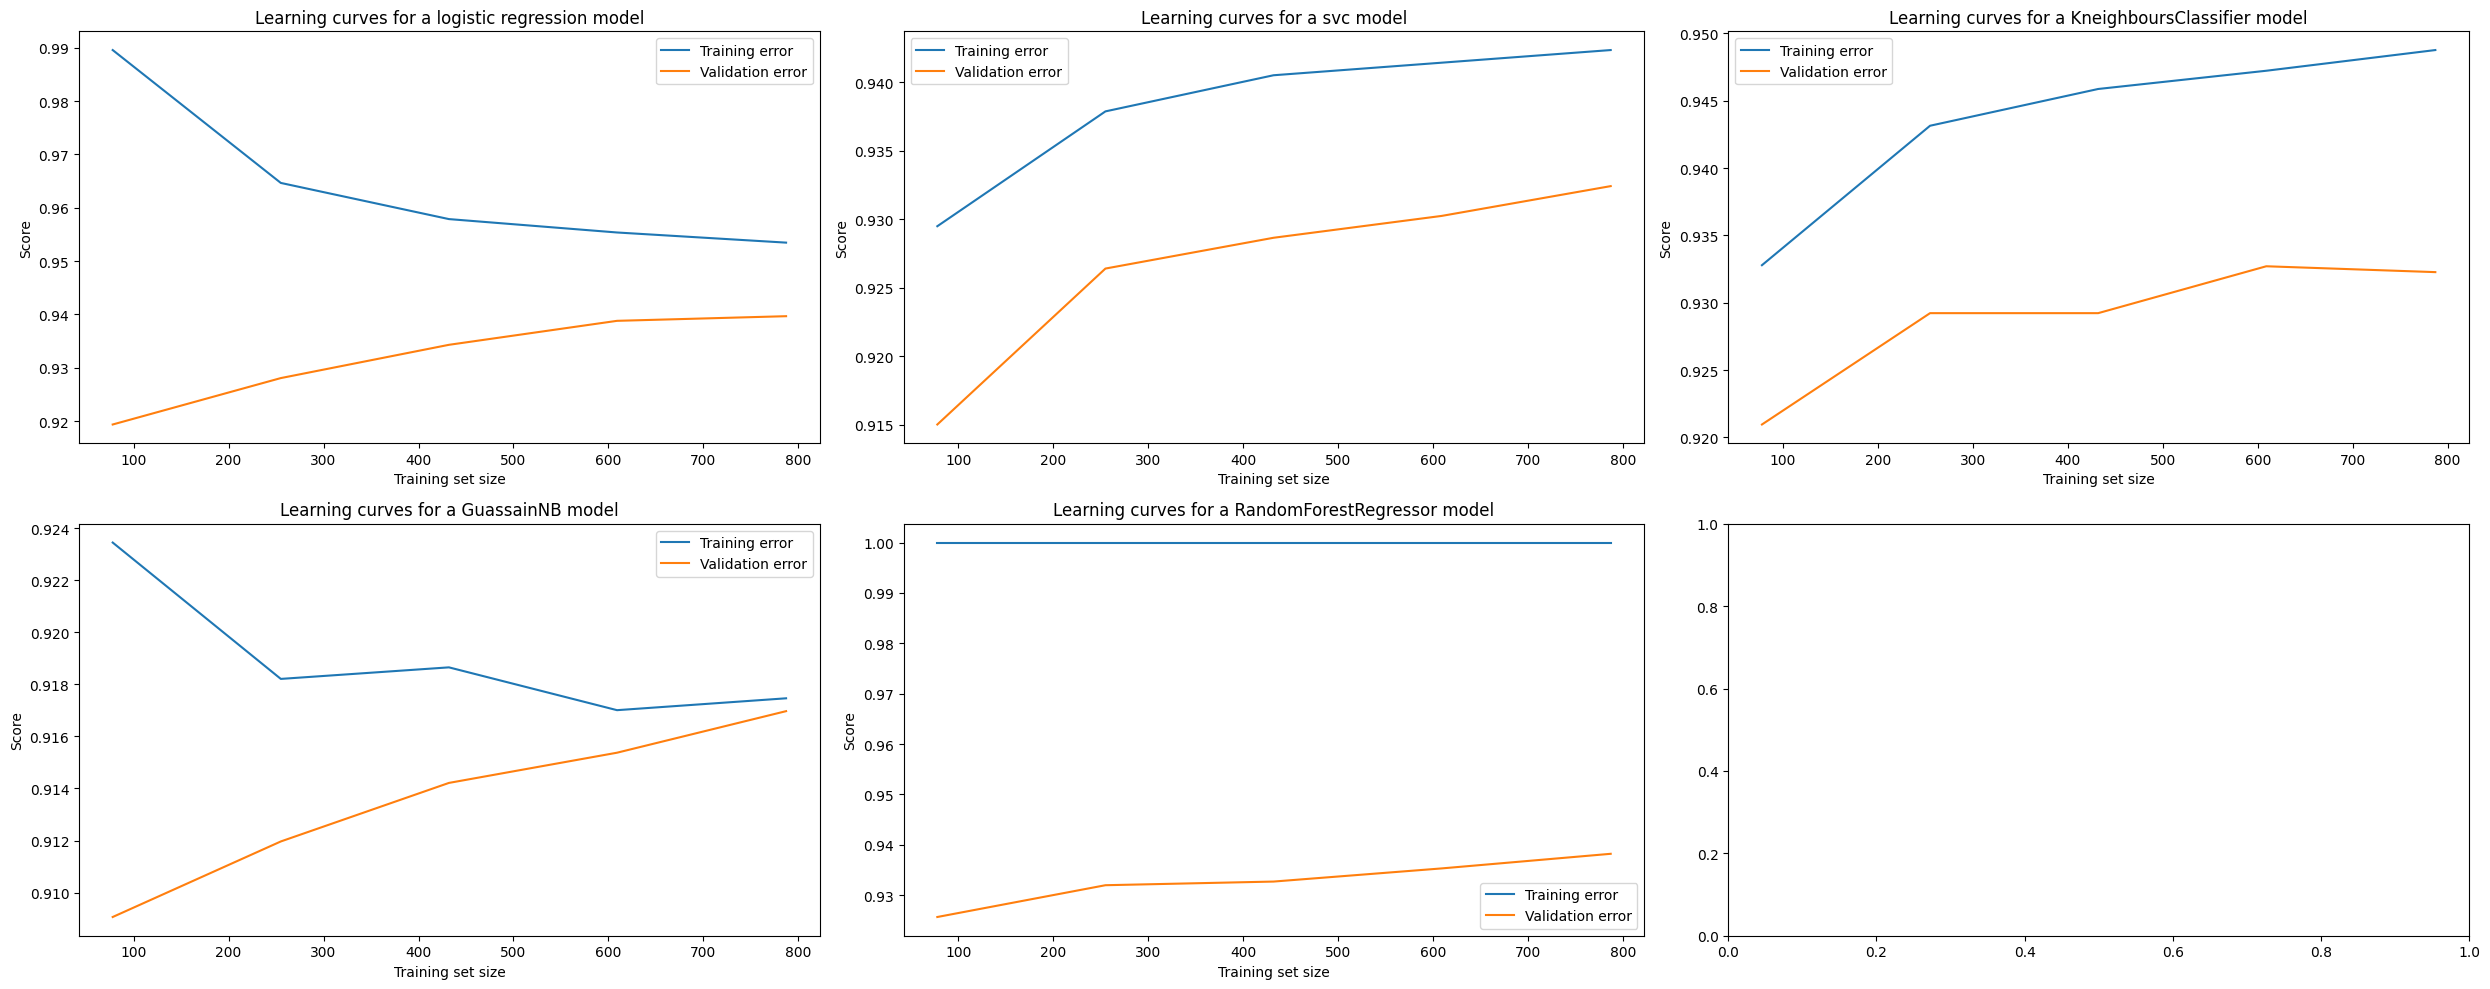

In [57]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=70,test_size=0.2,random_state=42)
fig,ax=plt.subplots(2,3,figsize=(25,10))
ax=ax.ravel()

# for logistic regression
train_sizes1, train_scores1, validation_scores1=learning_curve(lr,X_undersample,y_undersample,cv=cv)
train_score_mean1=train_scores1.mean(axis=1)
validation_score_mean1=validation_scores1.mean(axis=1)

ax[0].plot(train_sizes1, train_score_mean1, label = 'Training error')
ax[0].plot(train_sizes1, validation_score_mean1, label = 'Validation error')
ax[0].set_xlabel('Training set size')
ax[0].set_ylabel('Score')
ax[0].set_title('Learning curves for a logistic regression model')
ax[0].legend()
plt.tight_layout()

# for svc
train_sizes2, train_scores2, validation_scores2=learning_curve(svc,X_undersample,y_undersample,cv=cv)
train_score_mean2=train_scores2.mean(axis=1)
validation_score_mean2=validation_scores2.mean(axis=1)

ax[1].plot(train_sizes2, train_score_mean2, label = 'Training error')
ax[1].plot(train_sizes2, validation_score_mean2, label = 'Validation error')
ax[1].set_xlabel('Training set size')
ax[1].set_ylabel('Score')
ax[1].set_title('Learning curves for a svc model')
ax[1].legend()
plt.tight_layout()

#for KneighbourClassifier
train_sizes3, train_scores3, validation_scores3=learning_curve(knn,X_undersample,y_undersample,cv=cv)
train_score_mean3=train_scores3.mean(axis=1)
validation_score_mean3=validation_scores3.mean(axis=1)
ax[2].plot(train_sizes3, train_score_mean3, label = 'Training error')
ax[2].plot(train_sizes3, validation_score_mean3, label = 'Validation error')
ax[2].set_xlabel('Training set size')
ax[2].set_ylabel('Score')
ax[2].set_title('Learning curves for a KneighboursClassifier model')
ax[2].legend()
plt.tight_layout()

#For GuassainNB
train_sizes4, train_scores4, validation_scores4=learning_curve(gnb,X_undersample,y_undersample,cv=cv)
train_score_mean4=train_scores4.mean(axis=1)
validation_score_mean4=validation_scores4.mean(axis=1)
ax[3].plot(train_sizes4, train_score_mean4, label = 'Training error')
ax[3].plot(train_sizes4, validation_score_mean4, label = 'Validation error')
ax[3].set_xlabel('Training set size')
ax[3].set_ylabel('Score')
ax[3].set_title('Learning curves for a GuassainNB model')
ax[3].legend()
plt.tight_layout()

#For RandomForestRegressor
train_sizes5, train_scores5, validation_scores5=learning_curve(rfc,X_undersample,y_undersample,cv=cv)
train_score_mean5=train_scores5.mean(axis=1)
validation_score_mean5=validation_scores5.mean(axis=1)
ax[4].plot(train_sizes5, train_score_mean5, label = 'Training error')
ax[4].plot(train_sizes5, validation_score_mean5, label = 'Validation error')
ax[4].set_xlabel('Training set size')
ax[4].set_ylabel('Score')
ax[4].set_title('Learning curves for a RandomForestRegressor model')
ax[4].legend()
plt.tight_layout()

plt.show()

<Figure size 800x600 with 0 Axes>

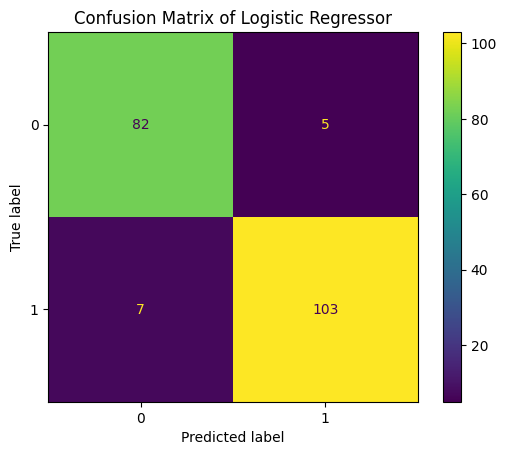

<Figure size 800x600 with 0 Axes>

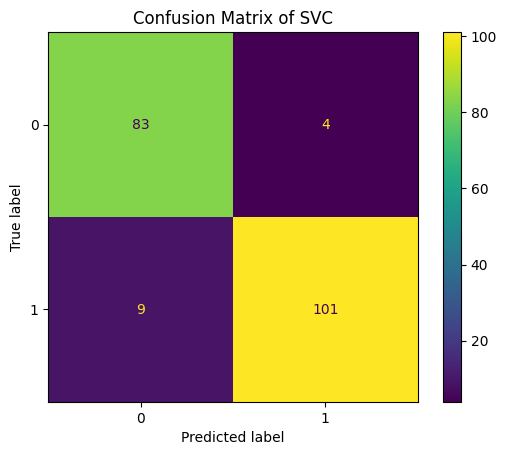

<Figure size 800x600 with 0 Axes>

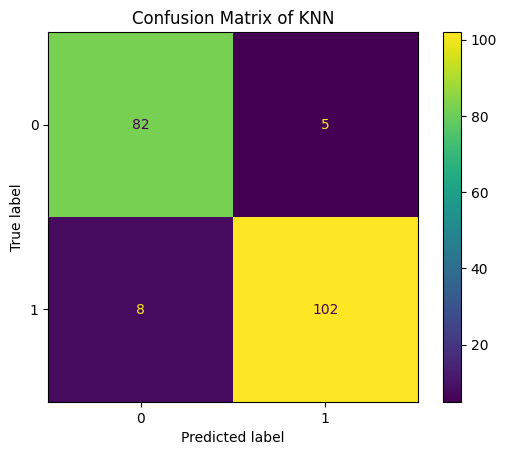

<Figure size 800x600 with 0 Axes>

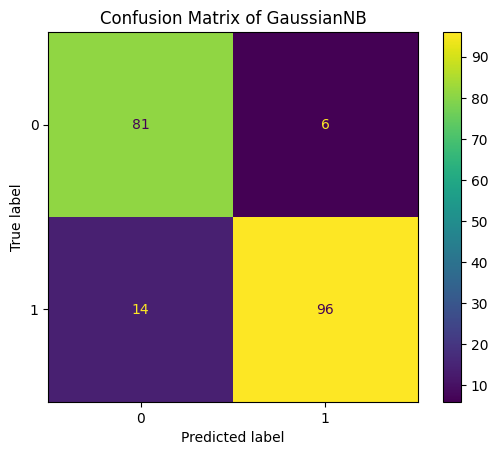

<Figure size 800x600 with 0 Axes>

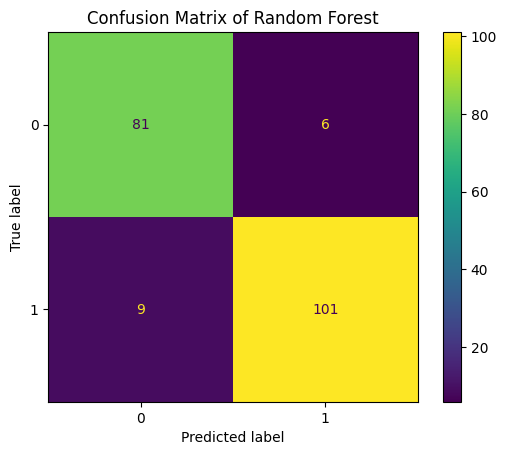

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regressor
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_lr)
plt.title('Confusion Matrix of Logistic Regressor')
plt.show()

# Support Vector Classifier
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_svc)
plt.title('Confusion Matrix of SVC')
plt.show()

# K-Nearest Neighbors
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_knn)
plt.title('Confusion Matrix of KNN')
plt.show()

# Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_gnb)
plt.title('Confusion Matrix of GaussianNB')
plt.show()

# Random Forest Classifier
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_rfc)
plt.title('Confusion Matrix of Random Forest')
plt.show()


### With grid tuning on RF

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Definisikan parameter yang akan dituning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# RandomForestClassifier dengan GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # Gunakan 5-fold cross-validation
    n_jobs=-1,  # Paralelkan semua core
    verbose=2,
    return_train_score=True  # Aktifkan untuk mencatat training loss
)

# Fit pada data training yang sudah di-undersample
grid_search.fit(x_train_us, y_train_us)

# Parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Model terbaik
best_rf = grid_search.best_estimator_

# Evaluasi model
y_pred_rf = best_rf.predict(x_test_us)
print("ROC AUC Score:", roc_auc_score(y_test_us, y_pred_rf))
print(classification_report(y_test_us, y_pred_rf))

# --------------------------------------------------
# Mencatat Training dan Testing Loss
# --------------------------------------------------

# Ambil hasil dari GridSearchCV
cv_results = pd.DataFrame(grid_search.cv_results_)

# Ambil parameter yang diuji dan skor
train_scores = cv_results['mean_train_score']
test_scores = cv_results['mean_test_score']
params = cv_results['params']

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_de

<Figure size 800x600 with 0 Axes>

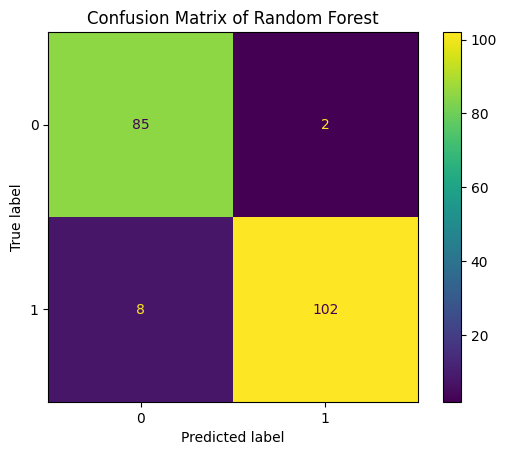

In [70]:
# Random Forest Classifier
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_us, y_pred_rf)
plt.title('Confusion Matrix of Random Forest')
plt.show()

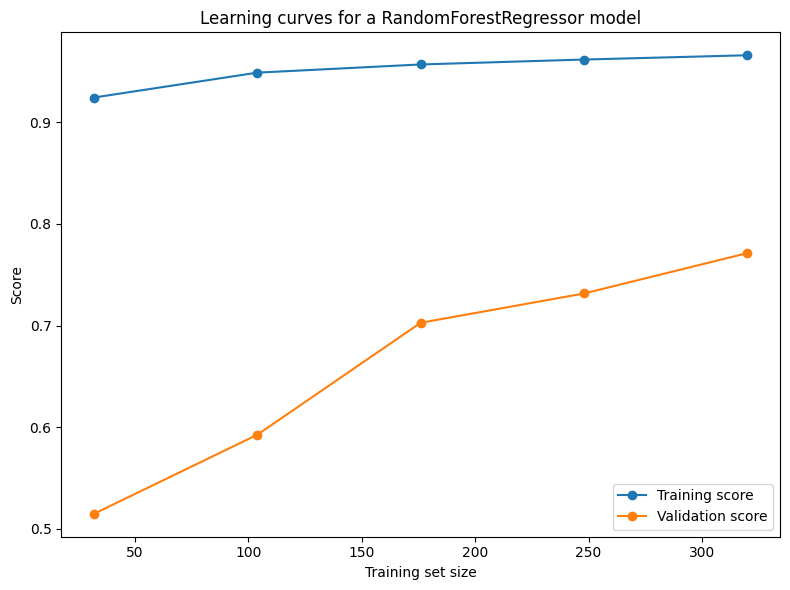

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve, train_test_split

# Dataset dummy (ganti dengan dataset Anda)
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=10, noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestRegressor(random_state=42)

# Learning curve
train_sizes5, train_scores5, validation_scores5 = learning_curve(
    estimator=rf,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Mean scores
train_score_mean5 = train_scores5.mean(axis=1)
validation_score_mean5 = validation_scores5.mean(axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes5, train_score_mean5, label='Training score', marker='o')
plt.plot(train_sizes5, validation_score_mean5, label='Validation score', marker='o')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curves for a RandomForestRegressor model')
plt.legend()
plt.tight_layout()
plt.show()


### oversampling


In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
print(f'Original Train Size:{len(x_train)} ')
print(f'Original Test Size:{len(x_test)} ')

Original Train Size:227846 
Original Test Size:56961 


In [18]:
df.shape

(284807, 31)

In [19]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE

# SMOTE Resampling
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)


In [14]:
print("Class distribution in y_smote after SMOTE:")
print(pd.Series(y_smote).value_counts())

Class distribution in y_smote after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X_smote, y_smote, cv=5, scoring='roc_auc')
print("Cross-Validation ROC AUC Scores:", scores)
print("Mean ROC AUC:", scores.mean())

Cross-Validation ROC AUC Scores: [0.99999994 0.99999967 0.99999713 1.         0.99997641]
Mean ROC AUC: 0.9999946307538057


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Logistic Regression on SMOTE
print("--------------------Logistic Regression (SMOTE)-------------------")
lr_smote = LogisticRegression()
lr_smote.fit(X_smote, y_smote)
y_pred_lr_smote = lr_smote.predict(X_test)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr_smote))
print(classification_report(y_test, y_pred_lr_smote))
print()

# Random Forest Classifier on SMOTE
print("------------------RandomForestClassifier (SMOTE)----------------")
rfc_smote = RandomForestClassifier()
rfc_smote.fit(X_smote, y_smote)
y_pred_rfc_smote = rfc_smote.predict(X_test)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rfc_smote))
print(classification_report(y_test, y_pred_rfc_smote))
print()


--------------------Logistic Regression (SMOTE)-------------------
ROC AUC Score: 0.9465746413928543
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


------------------RandomForestClassifier (SMOTE)----------------
ROC AUC Score: 0.9131509983002768
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


